/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_7908/848252311.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


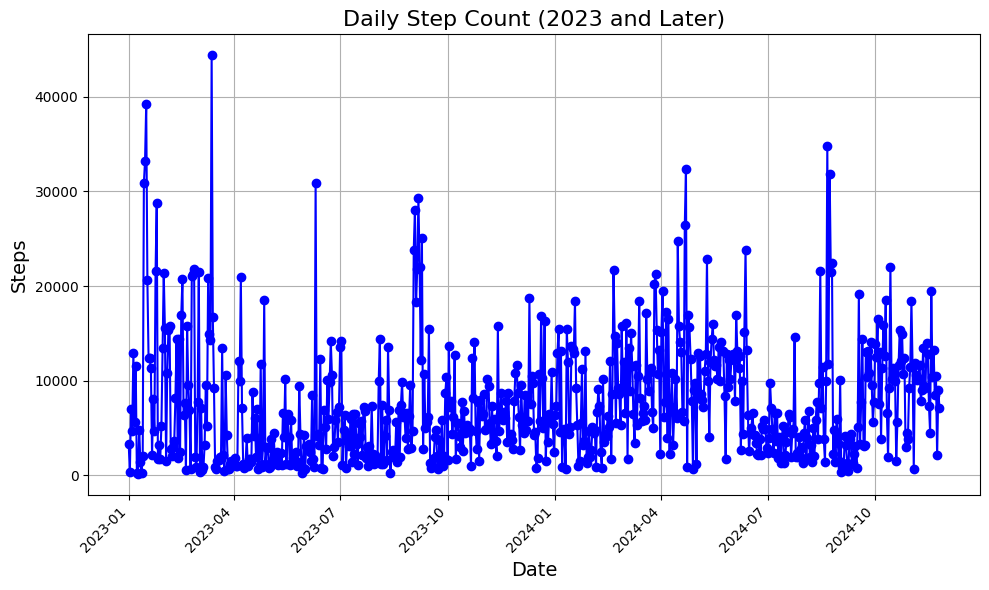

/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_7908/848252311.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['startDate'].dt.to_period('M')


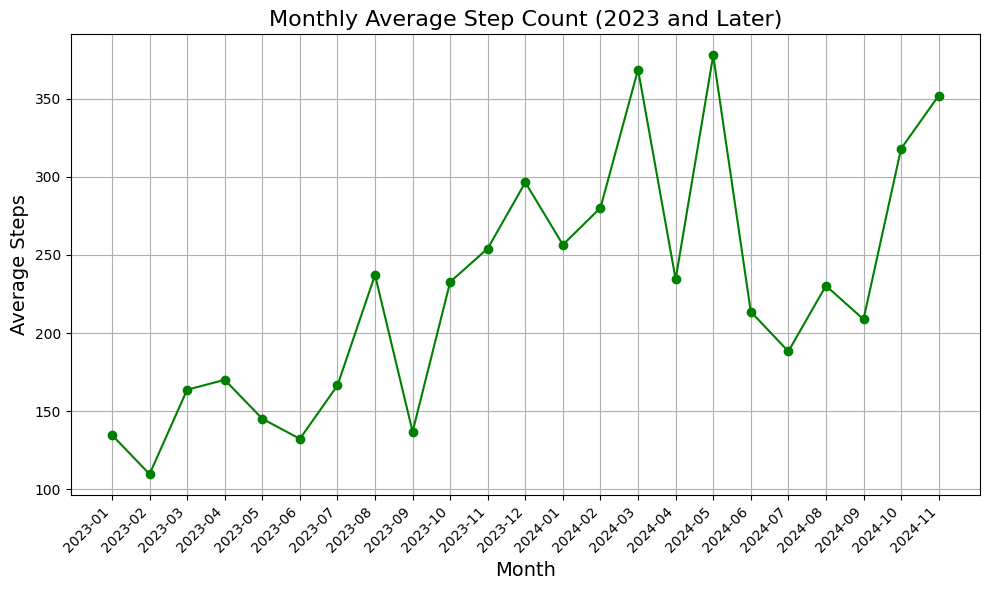

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    df['startDate'] = pd.to_datetime(df['startDate'])

    df = df[df['startDate'].dt.year >= 2023]

    df['date'] = df['startDate'].dt.date

    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return df, daily_steps

def calculate_monthly_average(df):
    df['year_month'] = df['startDate'].dt.to_period('M')

    monthly_average_steps = df.groupby('year_month')['value'].mean().reset_index()

    return monthly_average_steps

def plot_daily_steps(daily_steps):
    plt.figure(figsize=(10, 6))
    plt.plot(daily_steps['date'], daily_steps['value'], marker='o', linestyle='-', color='b')
    plt.title('Daily Step Count (2023 and Later)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Steps', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_monthly_average_steps(monthly_average_steps):
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_average_steps['year_month'].astype(str), monthly_average_steps['value'], marker='o', linestyle='-', color='g')
    plt.title('Monthly Average Step Count (2023 and Later)', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Steps', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main(csv_file):
    df, daily_steps = load_and_process_data(csv_file)

    plot_daily_steps(daily_steps)

    monthly_average_steps = calculate_monthly_average(df)
    plot_monthly_average_steps(monthly_average_steps)

csv_file = 'apple_health_data.csv' 

main(csv_file)
